In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [79]:
# Load dataset from the same folder
df = pd.read_csv("Iris.csv")

# Drop the 'Id' column as it's not needed
df.drop('Id', axis=1, inplace=True)

In [80]:
# Function to plot histogram for Sepal Length
def plot_histogram():
    plt.figure(figsize=(8, 5))
    plt.hist(df['SepalLengthCm'], bins=15, color='skyblue', edgecolor='black')
    plt.title('Histogram of Sepal Length')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [81]:
# Function to create a heatmap of the correlations
def plot_heatmap():
    # Drop non-numeric columns explicitly
    numeric_df = df.drop(columns=['Species'], errors='ignore')

    plt.figure(figsize=(8, 6))
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap of Feature Correlations')
    plt.show()


In [82]:
# Function to perform k-means clustering and plot scatter plot
def kmeans_clustering():
    # Use Sepal Length and Sepal Width for clustering
    X = df[['SepalLengthCm', 'SepalWidthCm']]

    # Determine optimal number of clusters using the elbow method
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    # Perform KMeans with optimal k=3 (for Iris dataset)
    kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
    df['Cluster'] = kmeans.fit_predict(X)

    # Plot scatter plot with clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=df, palette='Set1')
    plt.title('K-Means Clustering (k=3)')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

In [83]:
# Function to perform linear regression and plot line fit
def linear_regression_fit():
    X = df[['SepalLengthCm']].values
    y = df['PetalLengthCm'].values

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict y values
    y_pred = model.predict(X)

    # Plot the scatter plot and the regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title('Linear Regression Fit: Sepal Length vs Petal Length')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.legend()
    plt.grid(True)
    plt.show()

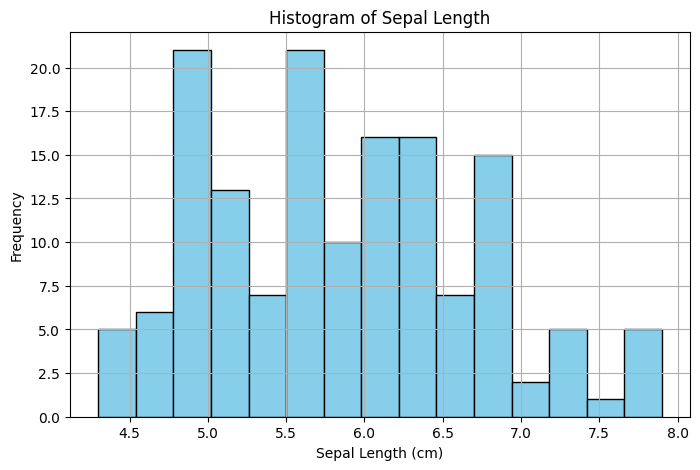

In [84]:
# Call the functions to generate the required plots in the correct order
plot_histogram()

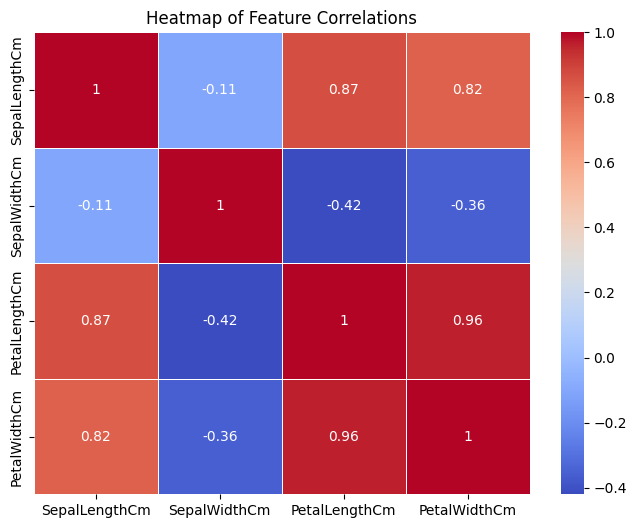

In [85]:
plot_heatmap()

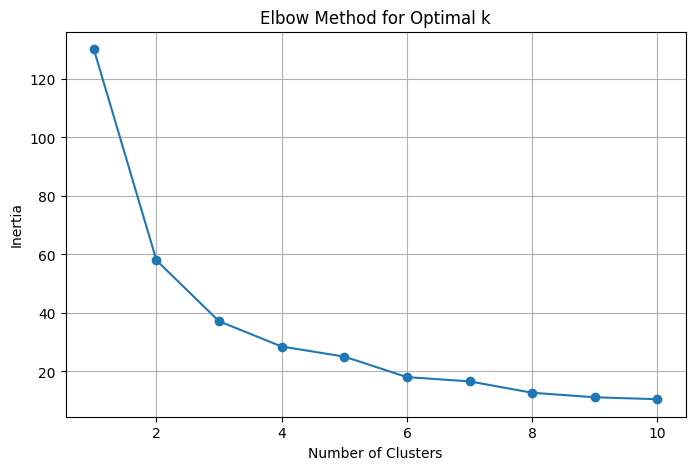

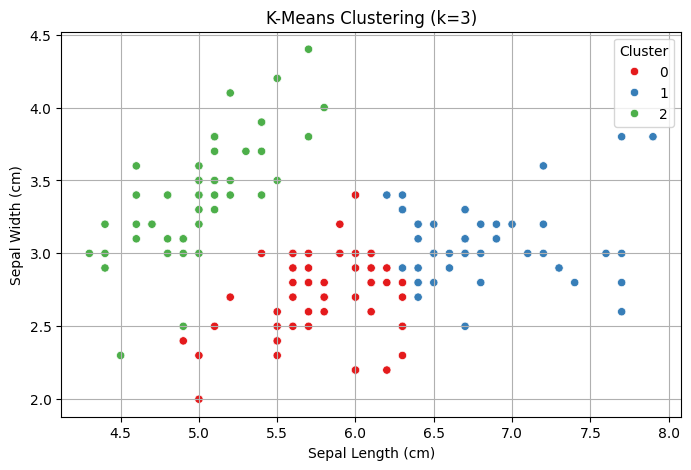

In [86]:
kmeans_clustering()

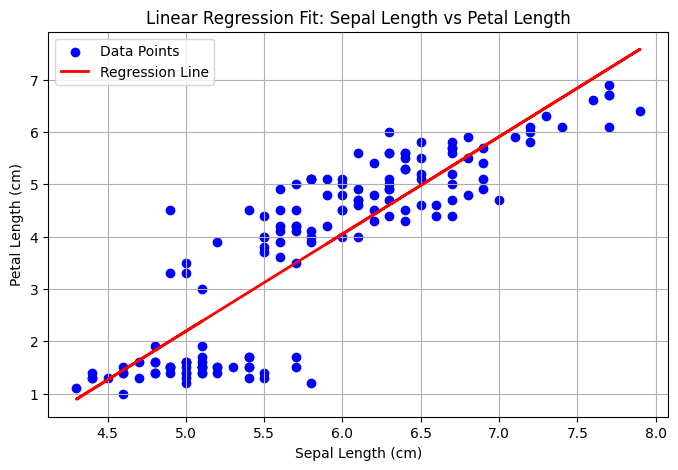

In [87]:
linear_regression_fit()